### 1. Importing libraries & datasets

In [1]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import folium
import json

In [2]:
# import datasets

# create path for dataset 
path = r'C:\Users\pears\Desktop\CF\Achievement 6\datasets'

# create filepaths
filepath1 = os.path.join(path, '.pkl', 'all_merge_numbers2.pkl')
filepath2 = os.path.join(path, 'JSON', 'world-countries.json')
# geoJSON file from https://www.kaggle.com/datasets/ktochylin/world-countries/

# assign df names
df = pd.read_pickle(filepath1)
geo = pd.read_json(filepath2)

In [3]:
# view geo json

f = open(r'C:\Users\pears\Desktop\CF\Achievement 6\datasets\JSON\world-countries.json',)
  
# returns JSON object as dictionary
geo = json.load(f)

# iterating through json list
for i in geo['features']:
    print(i)

{'type': 'Feature', 'properties': {'name': 'Afghanistan'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[61.210817, 35.650072], [62.230651, 35.270664], [62.984662, 35.404041], [63.193538, 35.857166], [63.982896, 36.007957], [64.546479, 36.312073], [64.746105, 37.111818], [65.588948, 37.305217], [65.745631, 37.661164], [66.217385, 37.39379], [66.518607, 37.362784], [67.075782, 37.356144], [67.83, 37.144994], [68.135562, 37.023115], [68.859446, 37.344336], [69.196273, 37.151144], [69.518785, 37.608997], [70.116578, 37.588223], [70.270574, 37.735165], [70.376304, 38.138396], [70.806821, 38.486282], [71.348131, 38.258905], [71.239404, 37.953265], [71.541918, 37.905774], [71.448693, 37.065645], [71.844638, 36.738171], [72.193041, 36.948288], [72.63689, 37.047558], [73.260056, 37.495257], [73.948696, 37.421566], [74.980002, 37.41999], [75.158028, 37.133031], [74.575893, 37.020841], [74.067552, 36.836176], [72.920025, 36.720007], [71.846292, 36.509942], [71.262348, 36.074388], [71.498768,

### 2. Wrangling Data

In [4]:
# remove column limit of output 
pd.options.display.max_columns = None

# remove row limit of output 
pd.options.display.max_rows = None

In [5]:
df.head(5)

Entity Code Continent           Region  Schizophrenia  Bipolar  \
0     Afghanistan  AFG      Asia    Southern Asia         0.2260   0.7260   
1         Albania  ALB    Europe  Southern Europe         0.3071   0.5790   
2         Algeria  DZA    Africa  Northern Africa         0.2638   0.8008   
3  American Samoa  ASM   Oceania        Polynesia         0.3192   0.2943   
4         Andorra  AND    Europe  Southern Europe         0.3157   1.0300   

   Eating  Anxiety  Depressive  Average_ALL      GDPpc    AHDI  Income_group  \
0  0.1218   5.0337      5.1315       2.2478   1,934.56  0.1804           1.0   
1  0.1460   4.0993      2.6280       1.5519  11,104.17  0.5165           3.0   
2  0.2230   5.0529      4.3729       2.1427  14,228.03  0.3229           2.0   
3  0.1348   4.2545      2.7973       1.5600        NaN     NaN           4.0   
4  0.5739   6.0083      3.9744       2.3805        NaN     NaN           4.0   

   Legis  Policy  %Invest  F/F_have_been_A/D_YES  \
0    1.0     1.0      NaN                    NaN   
1    1.0     1.0      NaN                  28.00   
2    1.0     1.0     7.37                  20.88   
3    NaN     NaN      NaN                    NaN   
4    1.0     0.0      NaN                    NaN   

   Very_comfortable_speaking_about_A/D_with_F/F_YES  \
0                                               NaN   
1                                             25.49   
2                                             31.64   
3                                               NaN   
4                                               NaN   

   Verycomfortable_vs_Havebeen  talked_to_F/F  spent_time_in_nature_outdoors  \
0                          NaN            NaN                            NaN   
1                        -0.09       86.52499                       88.64183   
2                         0.52            NaN                            NaN   
3                          NaN            NaN                            NaN   
4                          NaN            NaN                            NaN   

   improved_healthy_lifestyle_behaviors  \
0                                   NaN   
1                              67.71693   
2                                   NaN   
3                                   NaN   
4                                   NaN   

   made_change_to_personal_relationships  made_change_to_work_situation  \
0                                    NaN                            NaN   
1                                54.1925                       39.66084   
2                                    NaN                            NaN   
3                                    NaN                            NaN   
4                                    NaN                            NaN   

   took_prescribed_medication  talked_to_mental_health_professional  \
0                         NaN                                   NaN   
1                    40.89743                              34.49906   
2                         NaN                                   NaN   
3                         NaN                                   NaN   
4                         NaN                                   NaN   

   engaged_in_religious_spiritual_activities  Life_ladder  Social_support  \
0                                        NaN        2.662           0.491   
1                                    36.1776        4.640           0.638   
2                                        NaN        5.249           0.807   
3                                        NaN          NaN             NaN   
4                                        NaN          NaN             NaN   

   Healthy_life_expectancy_at_birth  Freedom_to_make_life_choices  \
0                             53.25                         0.427   
1                             69.05                         0.750   
2                             66.20                         0.437   
3                               NaN                           NaN 

In [6]:
# choosing select columns for choropleth map

choro = df[['Entity','Continent','Anxiety','Depressive', 'AHDI', 'Social_support', 'F/F_have_been_A/D_YES', 'Very_comfortable_speaking_about_A/D_with_F/F_YES', 'Verycomfortable_vs_Havebeen', 'talked_to_F/F', 'spent_time_in_nature_outdoors', 'improved_healthy_lifestyle_behaviors', 'made_change_to_personal_relationships', 'made_change_to_work_situation', 'took_prescribed_medication', 'talked_to_mental_health_professional', 'engaged_in_religious_spiritual_activities', 'Positive_affect', 'Negative_affect']]

In [7]:
# shortening columns names

choro.rename(columns = {'Entity':'entity','Continent':'continent','Anxiety':'anxiety', 'Depressive':'depressive', 'Social_support':'social', 'F/F_have_been_A/D_YES':'ffAD', 'Very_comfortable_speaking_about_A/D_with_F/F_YES':'comfortable', 'Verycomfortable_vs_Havebeen':'vs', 'talked_to_F/F':'f/f', 'spent_time_in_nature_outdoors':'nature', 'improved_healthy_lifestyle_behaviors':'lifestyle', 'made_change_to_personal_relationships':'relationship', 'made_change_to_work_situation':'work', 'took_prescribed_medication':'meds', 'talked_to_mental_health_professional':'prof','engaged_in_religious_spiritual_activities':'religion', 'Positive_affect':'pos', 'Negative_affect':'neg' }, inplace=True)

C:\Users\pears\AppData\Local\Temp\ipykernel_5056\2291667260.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  choro.rename(columns = {'Entity':'entity','Continent':'continent','Anxiety':'anxiety', 'Depressive':'depressive', 'Social_support':'social', 'F/F_have_been_A/D_YES':'ffAD', 'Very_comfortable_speaking_about_A/D_with_F/F_YES':'comfortable', 'Verycomfortable_vs_Havebeen':'vs', 'talked_to_F/F':'f/f', 'spent_time_in_nature_outdoors':'nature', 'improved_healthy_lifestyle_behaviors':'lifestyle', 'made_change_to_personal_relationships':'relationship', 'made_change_to_work_situation':'work', 'took_prescribed_medication':'meds', 'talked_to_mental_health_professional':'prof','engaged_in_religious_spiritual_activities':'religion', 'Positive_affect':'pos', 'Negative_affect':'neg' }, inplace=True)


In [8]:
choro.head(5)

entity continent  anxiety  depressive    AHDI  social   ffAD  \
0     Afghanistan      Asia   5.0337      5.1315  0.1804   0.491    NaN   
1         Albania    Europe   4.0993      2.6280  0.5165   0.638  28.00   
2         Algeria    Africa   5.0529      4.3729  0.3229   0.807  20.88   
3  American Samoa   Oceania   4.2545      2.7973     NaN     NaN    NaN   
4         Andorra    Europe   6.0083      3.9744     NaN     NaN    NaN   

   comfortable    vs       f/f    nature  lifestyle  relationship      work  \
0          NaN   NaN       NaN       NaN        NaN           NaN       NaN   
1        25.49 -0.09  86.52499  88.64183   67.71693       54.1925  39.66084   
2        31.64  0.52       NaN       NaN        NaN           NaN       NaN   
3          NaN   NaN       NaN       NaN        NaN           NaN       NaN   
4          NaN   NaN       NaN       NaN        NaN           NaN       NaN   

       meds      prof  religion    pos    neg  
0       NaN       NaN       NaN  0.435  0.371  
1  40.89743  34.49906   36.1776  0.547  0.334  
2       NaN       NaN       NaN  0.555  0.289  
3       NaN       NaN       NaN    NaN    NaN  
4       NaN       NaN       NaN    NaN    NaN

In [9]:
choro.dtypes

entity           object
continent        object
anxiety         float64
depressive      float64
AHDI            float64
social          float64
ffAD            float64
comfortable     float64
vs              float64
f/f             float64
nature          float64
lifestyle       float64
relationship    float64
work            float64
meds            float64
prof            float64
religion        float64
pos             float64
neg             float64
dtype: object

In [10]:
# dropping duplicate Congo row

choro.drop_duplicates(inplace=True)

C:\Users\pears\AppData\Local\Temp\ipykernel_5056\1698610366.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  choro.drop_duplicates(inplace=True)


In [11]:
# changing entity names to match geoJson

choro.replace({'entity': {'United States': 'United States of America', 'Congo': 'Republic of the Congo', 'Democratic Republic of Congo':'Democratic Republic of the Congo', 'Tanzania':'United Republic of Tanzania'}}, inplace=True)

C:\Users\pears\AppData\Local\Temp\ipykernel_5056\2917692476.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  choro.replace({'entity': {'United States': 'United States of America', 'Congo': 'Republic of the Congo', 'Democratic Republic of Congo':'Democratic Republic of the Congo', 'Tanzania':'United Republic of Tanzania'}}, inplace=True)


In [12]:
choro

entity      continent  anxiety  depressive  \
0                         Afghanistan           Asia   5.0337      5.1315   
1                             Albania         Europe   4.0993      2.6280   
2                             Algeria         Africa   5.0529      4.3729   
3                      American Samoa        Oceania   4.2545      2.7973   
4                             Andorra         Europe   6.0083      3.9744   
5                              Angola         Africa   4.0102      5.8554   
6                 Antigua and Barbuda  North America   4.5413      3.1735   
7                           Argentina  South America   5.3559      2.5877   
8                             Armenia           Asia   3.3665      3.1882   
9                           Australia        Oceania   6.4060      4.8278   
10                            Austria         Europe   6.5819      3.4246   
11                         Azerbaijan           Asia   2.6425      2.9359   
12                            Bahamas  North America   4.5605      3.2113   
13                            Bahrain           Asia   5.1520      4.7245   
14                         Bangladesh           Asia   3.2739      4.7549   
15                           Barbados  North America   4.5552      3.3446   
16                            Belarus         Europe   3.7598      4.1283   
17                            Belgium         Europe   5.5528      3.8969   
18                             Belize  North America   4.3693      3.4556   
19                              Benin         Africa   3.2921      4.5350   
20                            Bermuda  North America   4.5905      3.3694   
21                             Bhutan           Asia   3.3751      4.1570   
22                            Bolivia  South America   5.9889      3.5465   
23             Bosnia and Herzegovina         Europe   3.7811      2.9529   
24                           Botswana         Africa   3.7185      4.4552   
25                             Brazil  South America   7.7735      3.9880   
26                             Brunei           Asia   3.0939      1.7361   
27                           Bulgaria         Europe   3.6354      2.8803   
28                       Burkina Faso         Africa   3.1550      4.4320   
29                            Burundi         Africa   3.7067      4.7933   
30                           Cambodia           Asia   4.7149      3.0372   
31                           Cameroon         Africa   3.2849      4.7268   
32                             Canada  North America   4.7736      3.6355   
33                         Cape Verde         Africa   3.2332      5.0748   
34           Central African Republic         Africa   4.4533      5.9881   
35                               Chad         Africa   3.4293      5.2243   
36                              Chile  South America   5.9240      3.9518   
37                              China           Asia   3.3864      2.9153   
38                           Colombia  South America   4.9807      2.3514   
39                            Comoros         Africa   3.6823      4.4163   
40              Republic of the Congo         Africa   3.8116      5.6365   
42                       Cook Islands        Oceania   4.3089      3.3336   
43                         Costa Rica  North America   4.4673      3.4217   
44                      Cote d’Ivoire         Africa   3.3031      4.0114   
45                            Croatia         Europe   3.8675      3.2356   
46                               Cuba  North America   4.4902      4.0202   
47                             Cyprus           Asia   7.0147      3.3763   
48                            Czechia         Europe   3.4030      3.1062   
49   Democratic Republic of the Congo         Africa   3.8550      5.4999   
50                            Denmark         Europe   5.3887      3.8509   
51                           Djibouti         Africa   3.3861      4.6415   
52                         

### 3. Conduct consistency checks

In [13]:
# Check for missing values

choro.isnull().sum()

entity            0
continent         0
anxiety           0
depressive        0
AHDI             47
social           53
ffAD             95
comfortable      96
vs               96
f/f             105
nature          105
lifestyle       105
relationship    105
work            105
meds            105
prof            105
religion        106
pos              53
neg              53
dtype: int64

In [14]:
# descriptive analysis for anxiety prevalence 

choro.describe()

anxiety  depressive        AHDI      social        ffAD  \
count  205.000000  205.000000  158.000000  152.000000  110.000000   
mean     4.394867    3.911227    0.444913    0.800691   39.104182   
std      1.194377    0.908854    0.200898    0.126121   11.505581   
min      2.140400    1.736100    0.117800    0.320000   18.000000   
25%      3.635400    3.222700    0.278575    0.729000   29.207500   
50%      4.185900    3.871400    0.401500    0.825000   37.845000   
75%      4.878800    4.500000    0.582250    0.903500   50.267500   
max      8.791200    6.693100    0.885500    0.967000   65.780000   

       comfortable          vs         f/f      nature   lifestyle  \
count   109.000000  109.000000  100.000000  100.000000  100.000000   
mean     23.597248   -0.333761   79.774661   72.205821   70.623842   
std      13.182804    0.450022    7.400483   10.961933   10.532458   
min       2.710000   -0.910000   58.992280   37.830410   39.217320   
25%      13.330000   -0.620000   74.576157   64.111483   65.238352   
50%      21.370000   -0.500000   81.390625   76.201570   71.149155   
75%      28.220000   -0.130000   84.967613   80.852698   77.665392   
max      60.670000    1.670000   95.364040   88.641830   89.748720   

       relationship        work        meds        prof   religion  \
count    100.000000  100.000000  100.000000  100.000000  99.000000   
mean      60.268061   49.446966   48.993471   43.674096  42.886440   
std       10.583185   12.306545   13.950522   20.494055  20.250573   
min       35.618400   15.173210   15.956590    7.143850   6.689830   
25%       52.396493   42.092717   40.819065   25.185063  27.056810   
50%       59.022660   49.860670   47.765845   40.819730  44.477580   
75%       67.283552   56.944337   59.907927   60.736260  58.887765   
max       85.879180   74.296820   76.715740   84.336880  79.613980   

              pos         neg  
count  152.000000  152.000000  
mean     0.647395    0.294329  
std      0.108416    0.092935  
min      0.363000    0.114000  
25%      0.569000    0.229250  
50%      0.669000    0.282000  
75%      0.731000    0.345500  
max      0.823000    0.643000

(1.0, 10.0)

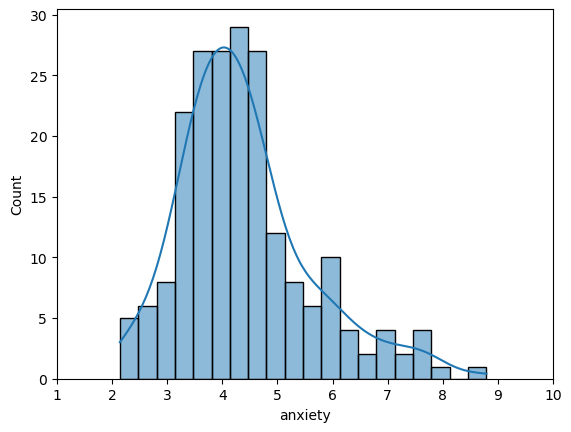

In [15]:
# histogram of anxiety disorder prevalence 

sns.histplot(choro['anxiety'], bins=20, kde = True)
plt.xlim(1, 10)

(1.0, 10.0)

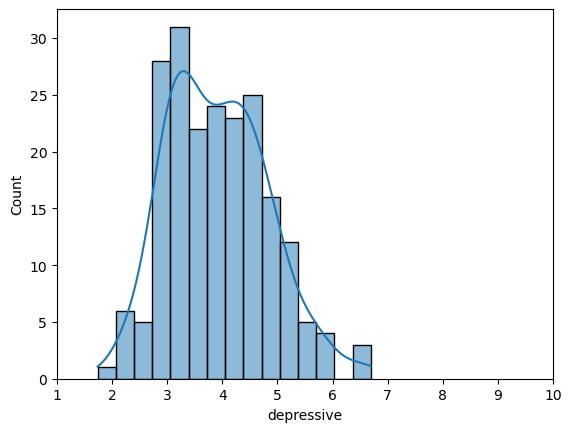

In [16]:
# histogram of depressive disorder prevalence 

sns.histplot(choro['depressive'], bins=15, kde = True)
plt.xlim(1, 10)

(0.0, 1.0)

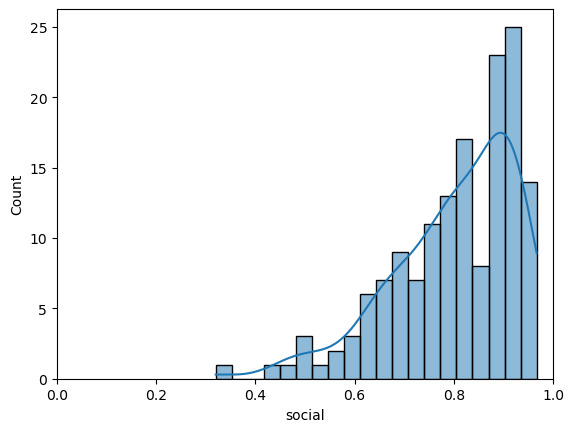

In [17]:
# histogram of social support

sns.histplot(choro['social'], bins=20, kde = True)
plt.xlim(0, 1)

(1.0, 100.0)

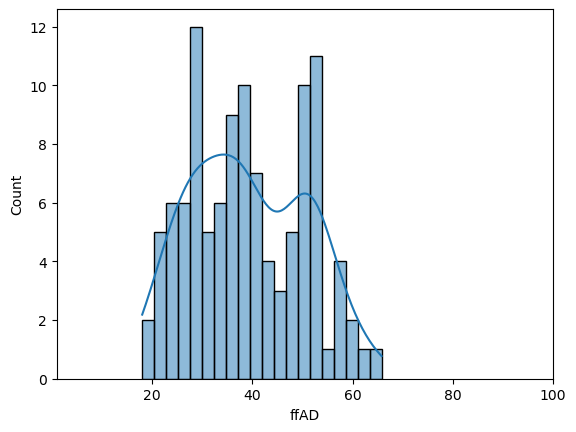

In [18]:
# histogram of % of those very comfortable talking to f/f about A/D themselves

sns.histplot(choro['ffAD'], bins=20, kde = True)
plt.xlim(1, 100)

(1.0, 100.0)

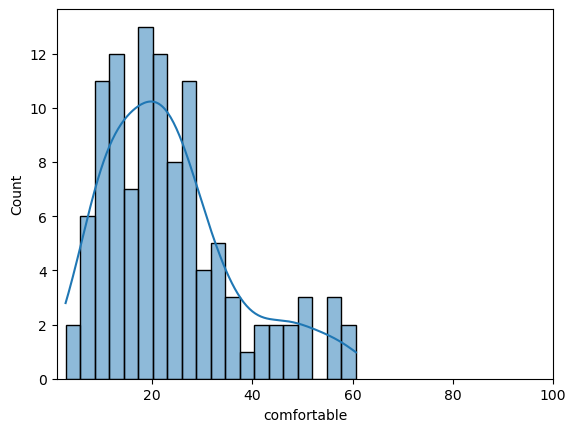

In [19]:
# histogram of % of those very comfortable talking to f/f about A/D themselves

sns.histplot(choro['comfortable'], bins=20, kde = True)
plt.xlim(1, 100)

<AxesSubplot: xlabel='vs', ylabel='Count'>

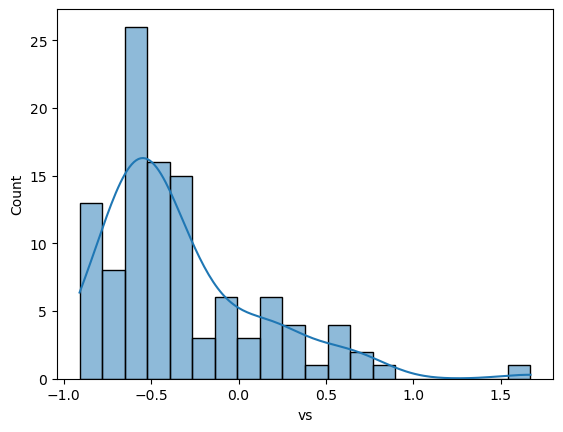

In [20]:
# histogram of those who know others w A/D vs very comfortable talking to f/f about A/D themselves

sns.histplot(choro['vs'], bins=20, kde = True)

(1.0, 100.0)

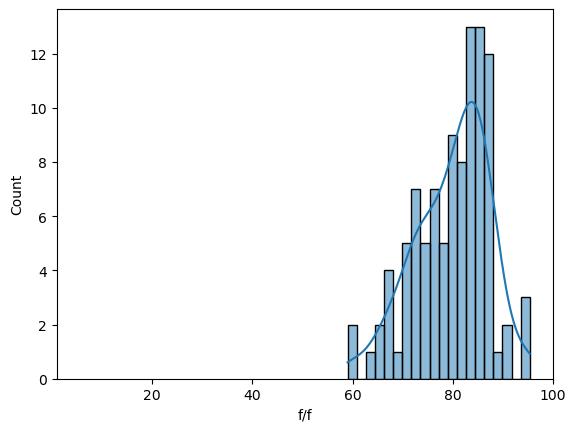

In [21]:
# histogram of % of those who coped by talking to friends/family 

sns.histplot(choro['f/f'], bins=20, kde = True)
plt.xlim(1, 100)

(1.0, 100.0)

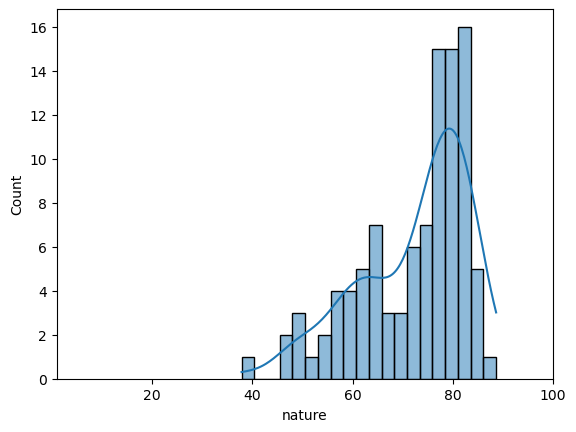

In [22]:
# histogram of % of those who coped by spending time outdoors/in nature 

sns.histplot(choro['nature'], bins=20, kde = True)
plt.xlim(1, 100)

(1.0, 100.0)

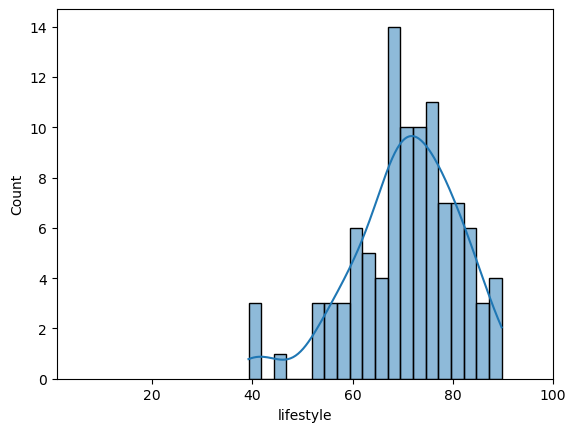

In [23]:
# histogram of % of those who coped by improving healthy lifestyle behaviors

sns.histplot(choro['lifestyle'], bins=20, kde = True)
plt.xlim(1, 100)

(1.0, 100.0)

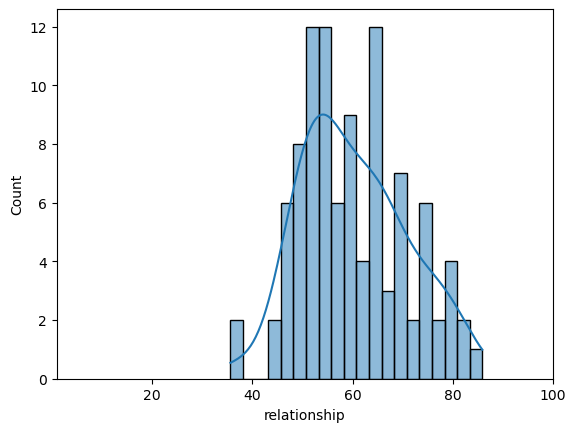

In [24]:
# histogram of % of those who coped by making changes in personal relationships

sns.histplot(choro['relationship'], bins=20, kde = True)
plt.xlim(1, 100)

(1.0, 100.0)

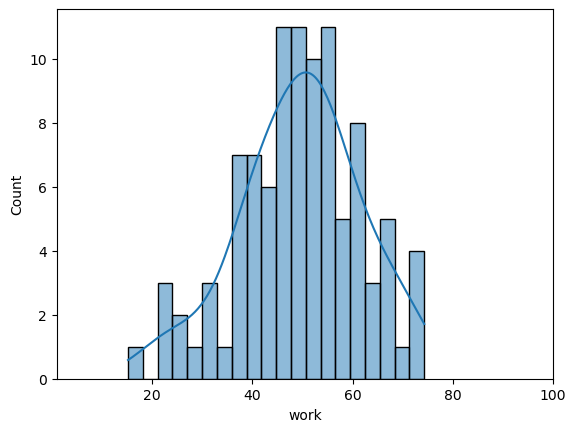

In [25]:
# histogram of % of those who coped by making changes in work situations

sns.histplot(choro['work'], bins=20, kde = True)
plt.xlim(1, 100)

(1.0, 100.0)

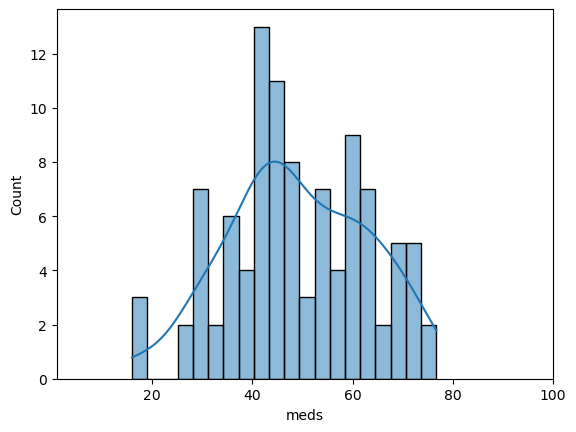

In [26]:
# histogram of % of those who coped by taking prescription meds

sns.histplot(choro['meds'], bins=20, kde = True)
plt.xlim(1, 100)

(1.0, 100.0)

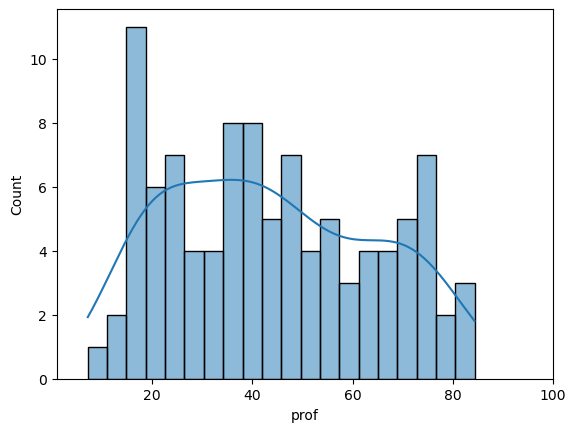

In [27]:
# histogram of % of those who coped by seeing medical professional

sns.histplot(choro['prof'], bins=20, kde = True)
plt.xlim(1, 100)

(1.0, 100.0)

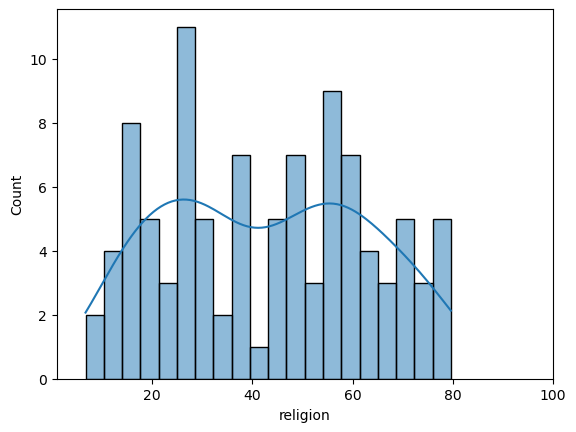

In [28]:
# histogram of % of those who coped by seeing medical professional

sns.histplot(choro['religion'], bins=20, kde = True)
plt.xlim(1, 100)

### 4. Plotting choropleth maps

#### a. Prevalence of anxiety disorder

In [29]:
# setup folium map at high-level zoom
map = folium.Map(location = [50, 0], zoom_start = 1)

# choropleth maps bind Pandas dfs and json geometries
folium.Choropleth(
    geo_data = geo, 
    data = choro,
    columns = ['entity', 'anxiety'],
    key_on = 'feature.properties.name',
    fill_color = 'RdYlGn_r', 
    nan_fill_color = 'transparent', 
    fill_opacity=0.5, 
    line_opacity=0.1,
    legend_name = "prevalence of anxiety disorder"
    ).add_to(map)
folium.LayerControl().add_to(map) 

map

#### b. Prevalence of depressive disorder

In [30]:
# setup folium map at high-level zoom
map = folium.Map(location = [50, 0], zoom_start = 1)

# choropleth maps bind Pandas dfs and json geometries
folium.Choropleth(
    geo_data = geo, 
    data = choro,
    columns = ['entity', 'depressive'],
    key_on = 'feature.properties.name',
    fill_color = 'RdYlGn_r', 
    nan_fill_color = 'transparent', 
    fill_opacity=0.5, 
    line_opacity=0.1,
    legend_name = "prevalence of depressive disorder"
    ).add_to(map)
folium.LayerControl().add_to(map) 

map

#### c. AHDI

In [31]:
# setup folium map at high-level zoom
map = folium.Map(location = [50, 0], zoom_start = 1)

# choropleth maps bind Pandas dfs and json geometries
folium.Choropleth(
    geo_data = geo, 
    data = choro,
    columns = ['entity', 'AHDI'],
    key_on = 'feature.properties.name',
    fill_color = 'RdYlGn_r', 
    nan_fill_color = 'transparent', 
    fill_opacity=0.5, 
    line_opacity=0.1,
    legend_name = "AHDI"
    ).add_to(map)
folium.LayerControl().add_to(map) 

map

#### d. Rating of social support

In [32]:
# setup folium map at high-level zoom
map = folium.Map(location = [50, 0], zoom_start = 1)

# choropleth maps bind Pandas dfs and json geometries
folium.Choropleth(
    geo_data = geo, 
    data = choro,
    columns = ['entity', 'social'],
    key_on = 'feature.properties.name',
    fill_color = 'RdYlGn_r', 
    nan_fill_color = 'transparent', 
    fill_opacity=0.5, 
    line_opacity=0.1,
    legend_name = "rating of social support"
    ).add_to(map)
folium.LayerControl().add_to(map) 

map

#### e. Those who are "very comfortable" talking to friends/family about their anxiety/depression

In [33]:
# setup folium map at high-level zoom
map = folium.Map(location = [50, 0], zoom_start = 1)

# choropleth maps bind Pandas dfs and json geometries
folium.Choropleth(
    geo_data = geo, 
    data = choro,
    columns = ['entity', 'comfortable'],
    key_on = 'feature.properties.name',
    fill_color = 'RdYlGn_r', 
    nan_fill_color = 'transparent', 
    fill_opacity=0.5, 
    line_opacity=0.1,
    legend_name = "% of those comfortable talking to friends/family about anxiety/depression"
    ).add_to(map)
folium.LayerControl().add_to(map) 

map

#### f. Those who are "very comfortable" talking to friends/family about their anxiety/depression vs those who know other friends/family with anxiety/depression

In [34]:
# setup folium map at high-level zoom
map = folium.Map(location = [50, 0], zoom_start = 1)

# choropleth maps bind Pandas dfs and json geometries
folium.Choropleth(
    geo_data = geo, 
    data = choro,
    columns = ['entity', 'vs'],
    key_on = 'feature.properties.name',
    fill_color = 'RdYlGn_r', 
    nan_fill_color = 'transparent', 
    fill_opacity=0.5, 
    line_opacity=0.1,
    legend_name = "% of those comfortable talking to F/F about A/D vs know other F/F with A/D"
    ).add_to(map)
folium.LayerControl().add_to(map) 

map

Majority of the world has F/F with A/D, yet do not feel very comfortable talking to F/F about their own A/D. Laos is the only country with a much higher rate. Also scored high for "very comfortable" talking to F/F about A/D.

#### g. Those who coped with anxiety/depression by talking to friends/family

In [35]:
# setup folium map at high-level zoom
map = folium.Map(location = [50, 0], zoom_start = 1)

# choropleth maps bind Pandas dfs and json geometries
folium.Choropleth(
    geo_data = geo, 
    data = choro,
    columns = ['entity', 'f/f'],
    key_on = 'feature.properties.name',
    fill_color = 'RdYlGn_r', 
    nan_fill_color = 'transparent', 
    fill_opacity=0.5, 
    line_opacity=0.1,
    legend_name = "% of those who coped with anxiety/depression by talking to friends/family"
    ).add_to(map)
folium.LayerControl().add_to(map) 

map

The % of "very comfortable" does not match the % of those who coped by talking to F/F (correlation coefficient of -0.03). This may show that even if people are not "very comfortable", it is still the most accessible form of coping and the most used coping mechanism. People don't need to feel "very comfortable" to reach out to F/F when they need to.

#### h. Those who coped with anxiety/depression by spending time outside/in nature

In [36]:
# setup folium map at high-level zoom
map = folium.Map(location = [50, 0], zoom_start = 1)

# choropleth maps bind Pandas dfs and json geometries
folium.Choropleth(
    geo_data = geo, 
    data = choro,
    columns = ['entity', 'nature'],
    key_on = 'feature.properties.name',
    fill_color = 'RdYlGn_r', 
    nan_fill_color = 'transparent', 
    fill_opacity=0.5, 
    line_opacity=0.1,
    legend_name = "% of those who coped with anxiety/depression by spending time outside/in nature"
    ).add_to(map)
folium.LayerControl().add_to(map) 

map

#### i. Those who coped with anxiety/depression by improving healthy lifestyle behaviors  

In [37]:
# setup folium map at high-level zoom
map = folium.Map(location = [50, 0], zoom_start = 1)

# choropleth maps bind Pandas dfs and json geometries
folium.Choropleth(
    geo_data = geo, 
    data = choro,
    columns = ['entity', 'lifestyle'],
    key_on = 'feature.properties.name',
    fill_color = 'RdYlGn_r', 
    nan_fill_color = 'transparent', 
    fill_opacity=0.5, 
    line_opacity=0.1,
    legend_name = "% of those who coped with anxiety/depression by improving healthy lifestyle behaviors"
    ).add_to(map)
folium.LayerControl().add_to(map) 

map

#### j. Those who coped with anxiety/depression by making changes to personal relationships 

In [38]:
# setup folium map at high-level zoom
map = folium.Map(location = [50, 0], zoom_start = 1)

# choropleth maps bind Pandas dfs and json geometries
folium.Choropleth(
    geo_data = geo, 
    data = choro,
    columns = ['entity', 'relationship'],
    key_on = 'feature.properties.name',
    fill_color = 'RdYlGn_r', 
    nan_fill_color = 'transparent', 
    fill_opacity=0.5, 
    line_opacity=0.1,
    legend_name = "% of those who coped with anxiety/depression by making changes to personal relationships"
    ).add_to(map)
folium.LayerControl().add_to(map) 

map

#### k. Those who coped with anxiety/depression by making changes to work situations

In [39]:
# setup folium map at high-level zoom
map = folium.Map(location = [50, 0], zoom_start = 1)

# choropleth maps bind Pandas dfs and json geometries
folium.Choropleth(
    geo_data = geo, 
    data = choro,
    columns = ['entity', 'work'],
    key_on = 'feature.properties.name',
    fill_color = 'RdYlGn_r', 
    nan_fill_color = 'transparent', 
    fill_opacity=0.5, 
    line_opacity=0.1,
    legend_name = "% of those who coped with anxiety/depression by making changes to work situations"
    ).add_to(map)
folium.LayerControl().add_to(map) 

map

#### l. Those who coped with anxiety/depression by taking prescription medications

In [40]:
# setup folium map at high-level zoom
map = folium.Map(location = [50, 0], zoom_start = 1)

# choropleth maps bind Pandas dfs and json geometries
folium.Choropleth(
    geo_data = geo, 
    data = choro,
    columns = ['entity', 'meds'],
    key_on = 'feature.properties.name',
    fill_color = 'RdYlGn_r', 
    nan_fill_color = 'transparent', 
    fill_opacity=0.5, 
    line_opacity=0.1,
    legend_name = "% of those who coped with anxiety/depression by taking prescription medications"
    ).add_to(map)
folium.LayerControl().add_to(map) 

map

#### m. Those who coped with anxiety/depression by seeing a medical professional

In [41]:
# setup folium map at high-level zoom
map = folium.Map(location = [50, 0], zoom_start = 1)

# choropleth maps bind Pandas dfs and json geometries
folium.Choropleth(
    geo_data = geo, 
    data = choro,
    columns = ['entity', 'prof'],
    key_on = 'feature.properties.name',
    fill_color = 'RdYlGn_r', 
    nan_fill_color = 'transparent', 
    fill_opacity=0.5, 
    line_opacity=0.1,
    legend_name = "% of those who coped with anxiety/depression by seeing a medical professional"
    ).add_to(map)
folium.LayerControl().add_to(map) 

map

#### n. Those who coped with anxiety/depression by engagining in religious/spiritual activities

In [42]:
# setup folium map at high-level zoom
map = folium.Map(location = [50, 0], zoom_start = 1)

# choropleth maps bind Pandas dfs and json geometries
folium.Choropleth(
    geo_data = geo, 
    data = choro,
    columns = ['entity', 'religion'],
    key_on = 'feature.properties.name',
    fill_color = 'RdYlGn_r', 
    nan_fill_color = 'transparent', 
    fill_opacity=0.5, 
    line_opacity=0.1,
    legend_name = "% of those who coped with anxiety/depression by engagining in religious/spiritual activities"
    ).add_to(map)
folium.LayerControl().add_to(map) 

map

#### o. % of those who rate their previous day as being positive

In [43]:
# setup folium map at high-level zoom
map = folium.Map(location = [50, 0], zoom_start = 1)

# choropleth maps bind Pandas dfs and json geometries
folium.Choropleth(
    geo_data = geo, 
    data = choro,
    columns = ['entity', 'pos'],
    key_on = 'feature.properties.name',
    fill_color = 'RdYlGn_r', 
    nan_fill_color = 'transparent', 
    fill_opacity=0.5, 
    line_opacity=0.1,
    legend_name = "% of those who rate their previous day as being overall positive"
    ).add_to(map)
folium.LayerControl().add_to(map) 

map

#### p. % of those who rate their previous day as being negative

In [44]:
# setup folium map at high-level zoom
map = folium.Map(location = [50, 0], zoom_start = 1)

# choropleth maps bind Pandas dfs and json geometries
folium.Choropleth(
    geo_data = geo, 
    data = choro,
    columns = ['entity', 'neg'],
    key_on = 'feature.properties.name',
    fill_color = 'RdYlGn_r', 
    nan_fill_color = 'transparent', 
    fill_opacity=0.5, 
    line_opacity=0.1,
    legend_name = "#### o. % of those who rate their previous day as being overall negative"
    ).add_to(map)
folium.LayerControl().add_to(map) 

map

### 5. Exporting choro df

In [45]:
choro.to_pickle(os.path.join(path, '.pkl', 'all_choro.pkl'))

### MULTI LAYERS IN SINGLE CHOROPLETH

In [46]:
# setup folium map at high-level zoom
map = folium.Map(location = [50, 0], zoom_start = 1)

# choropleth maps bind Pandas dfs and json geometries for ANXIETY
folium.Choropleth(
    geo_data = geo, 
    data = choro,
    columns = ['entity', 'anxiety'],
    key_on = 'feature.properties.name',
    fill_color = 'RdYlGn_r', 
    nan_fill_color = 'transparent', 
    fill_opacity=0.5, 
    line_opacity=0.1,
    legend_name = "prevalence of anxiety disorder", 
    name='anxiety'
    ).add_to(map)

# choropleth maps bind Pandas dfs and json geometries for DEPRESSIVE
folium.Choropleth(
    geo_data = geo, 
    data = choro,
    columns = ['entity', 'depressive'],
    key_on = 'feature.properties.name',
    fill_color = 'RdYlGn_r', 
    nan_fill_color = 'transparent', 
    fill_opacity=0.5, 
    line_opacity=0.1,
    legend_name = "prevalence of anxiety disorder",
    name='depressive'
    ).add_to(map)
folium.LayerControl().add_to(map) 

map